**Importing Libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [18]:
# to suppress warningss
from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
# setting the plot size for graphs:
plt.rcParams['figure.figsize'] = (8,6)

**Importing the data**

In [20]:
# loading the data from csv file to a Pandas DataFrame
BP_data = pd.read_csv('BP_data.csv')

In [21]:
# first 5 rows in the dataframe
BP_data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


**Data Pre-processing**

In [22]:
# finding the number of rows and columns
BP_data.shape

(2000, 15)

In [23]:
# getting some informations about the dataset
BP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [24]:

# checking for missing values
BP_data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [25]:
BP_data[BP_data.isnull().any(axis=1)]

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [26]:
BP_data.dropna(inplace=True)

In [27]:
# checking for missing values
BP_data.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [28]:
BP = BP_data.drop(["Patient_Number"], axis = 1)

In [29]:
BP.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
6,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
15,1,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0
28,1,9.37,0.95,38,11,1,0.0,0,30738,48217,336.0,1,1,1
30,0,14.19,0.37,40,46,1,0.0,0,3922,39971,8.0,3,0,1
35,0,10.49,0.54,25,16,1,1.0,0,14798,26236,449.0,3,0,0


In [30]:
# finding the number of rows and columns
BP.shape

(318, 14)

In [31]:
# Summary Statistics for Numerical Variables: 
BP.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.512579,10.843994,0.499843,34.389937,29.182390,1.0,0.440252,0.462264,23860.078616,25146.110063,260.113208,1.987421,0.506289,0.462264
std,0.500630,1.927853,0.283164,5.877200,12.140531,0.0,0.497200,0.499360,13931.763430,13842.787355,145.257716,0.802106,0.500748,0.499360
min,0.000000,8.130000,0.000000,25.000000,10.000000,1.0,0.000000,0.000000,894.000000,186.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,9.312500,0.270000,29.000000,19.000000,1.0,0.000000,0.000000,12747.500000,13904.250000,140.500000,1.000000,0.000000,0.000000
50%,1.000000,10.555000,0.500000,34.000000,30.000000,1.0,0.000000,0.000000,23194.500000,24991.500000,263.500000,2.000000,1.000000,0.000000
75%,1.000000,11.790000,0.747500,40.000000,39.000000,1.0,1.000000,1.000000,35856.000000,36832.250000,385.500000,3.000000,1.000000,1.000000
max,1.000000,16.070000,1.000000,44.000000,50.000000,1.0,1.000000,1.000000,49806.000000,49956.000000,496.000000,3.000000,1.000000,1.000000


In [32]:
BP.tail()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
1960,1,8.89,0.76,35,16,1,0.0,1,40347,13334,362.0,3,1,1
1961,0,12.15,0.72,27,19,1,0.0,0,4671,6349,485.0,3,1,0
1965,0,11.12,0.57,29,36,1,1.0,0,12563,33617,123.0,1,0,0
1969,1,14.74,0.88,33,50,1,0.0,0,34155,36707,62.0,1,1,0
1983,1,14.56,0.27,41,39,1,0.0,1,33487,23693,167.0,1,0,0


In [33]:
# getting some informations about the dataset
BP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 6 to 1983
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     318 non-null    int64  
 1   Level_of_Hemoglobin            318 non-null    float64
 2   Genetic_Pedigree_Coefficient   318 non-null    float64
 3   Age                            318 non-null    int64  
 4   BMI                            318 non-null    int64  
 5   Sex                            318 non-null    int64  
 6   Pregnancy                      318 non-null    float64
 7   Smoking                        318 non-null    int64  
 8   Physical_activity              318 non-null    int64  
 9   salt_content_in_the_diet       318 non-null    int64  
 10  alcohol_consumption_per_day    318 non-null    float64
 11  Level_of_Stress                318 non-null    int64  
 12  Chronic_kidney_disease         318 non-null    in

In [34]:
BP.dtypes

Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [35]:
num_vars = BP.columns
num_vars

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

**Data Vizualization**

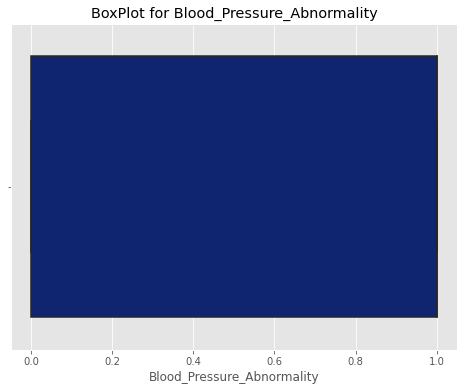

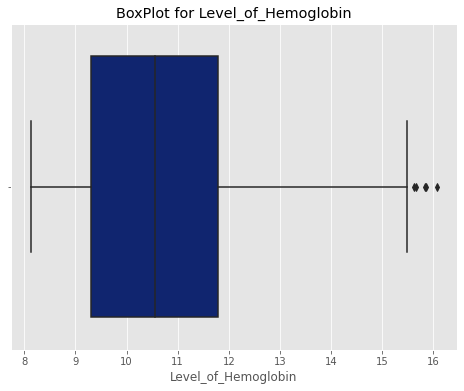

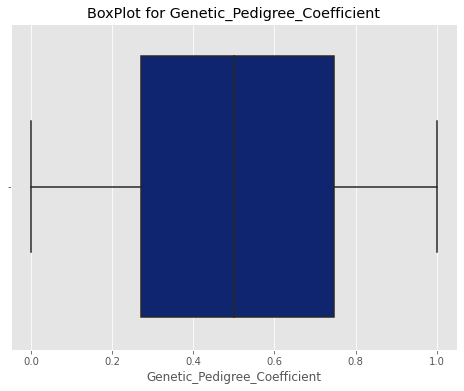

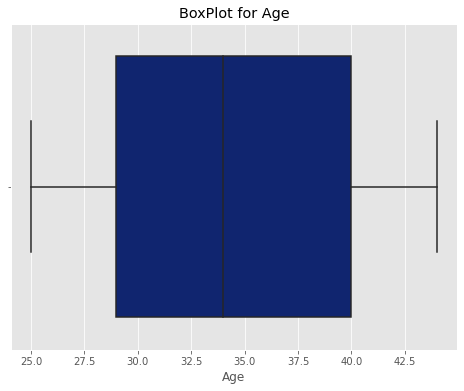

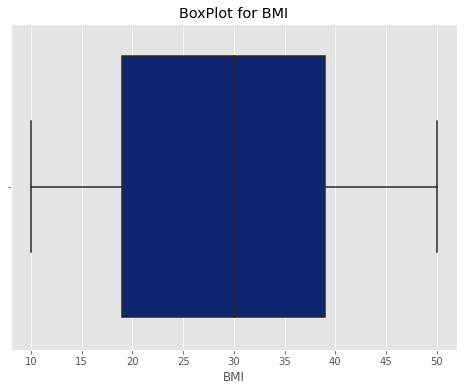

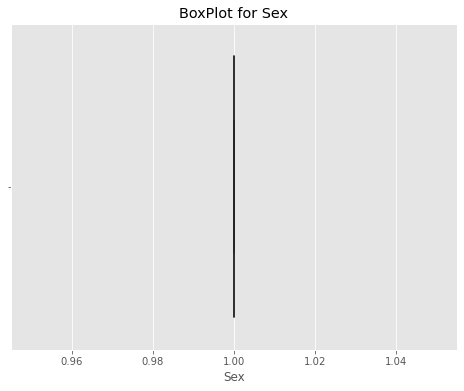

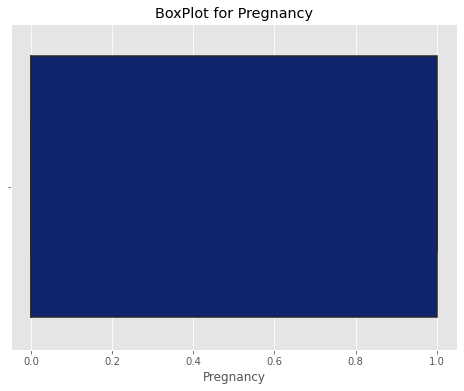

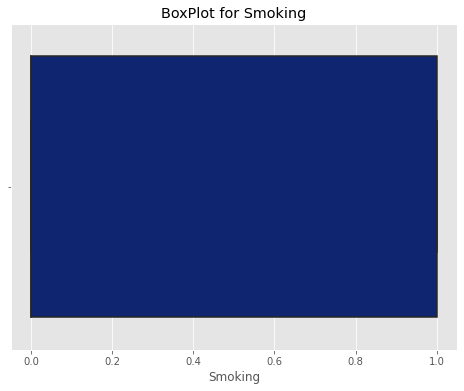

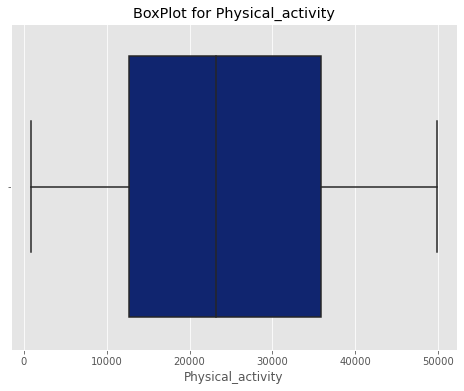

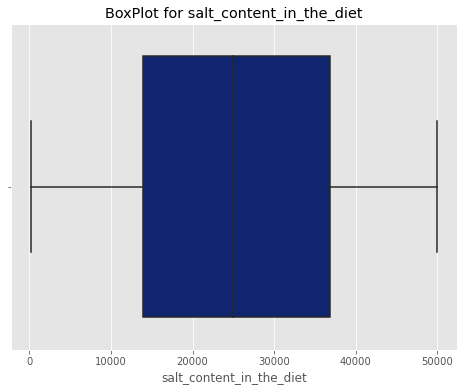

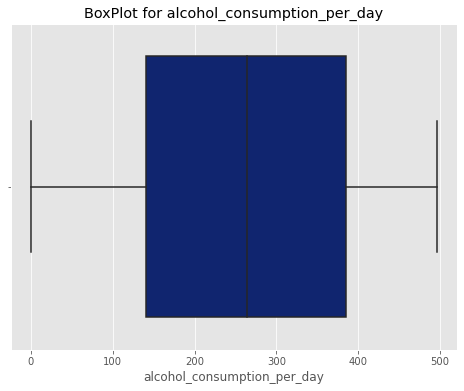

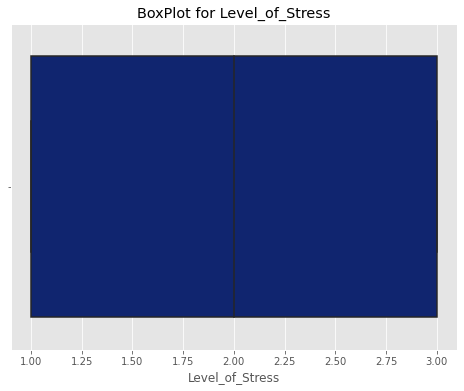

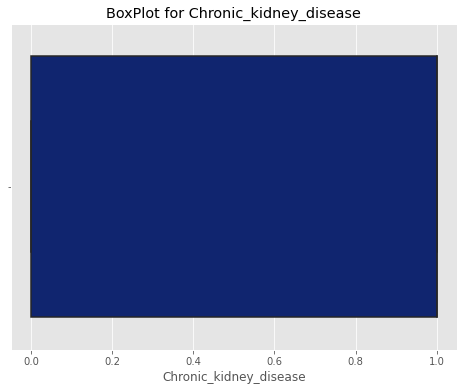

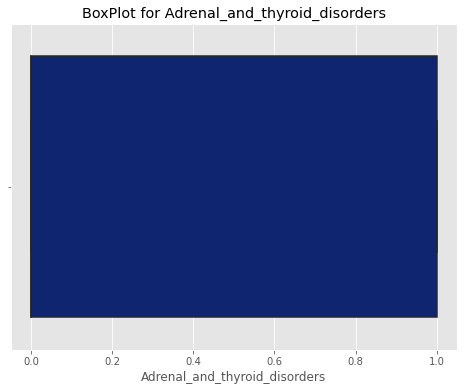

In [36]:
# Box Plot:
for i in num_vars:
    sns.boxplot(BP[i], palette='dark')
    plt.title('BoxPlot for {}'.format(i))
    plt.show()

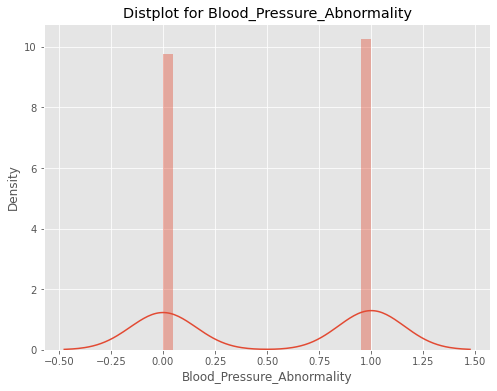

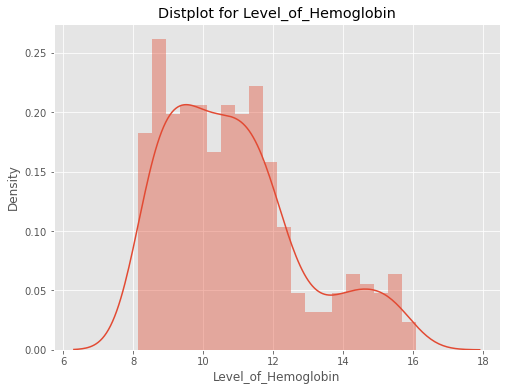

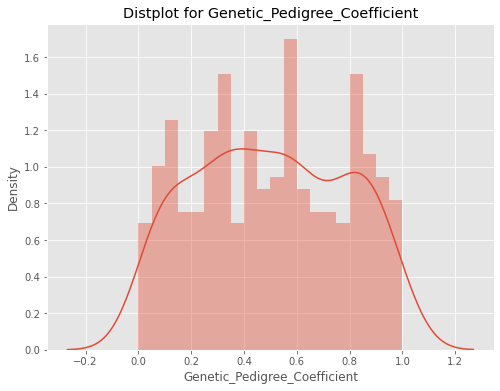

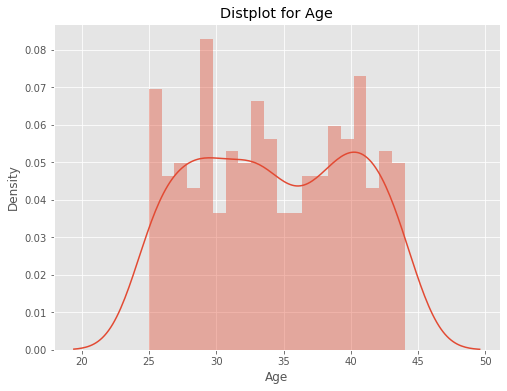

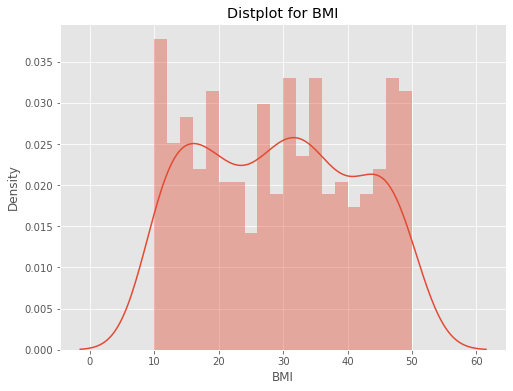

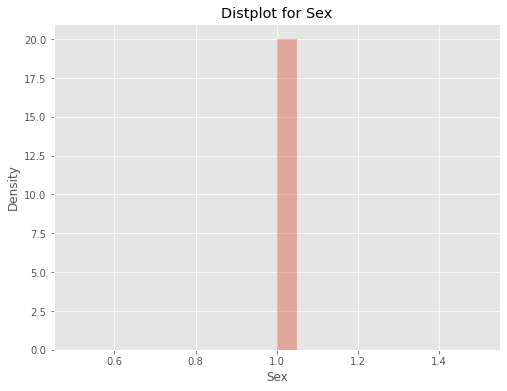

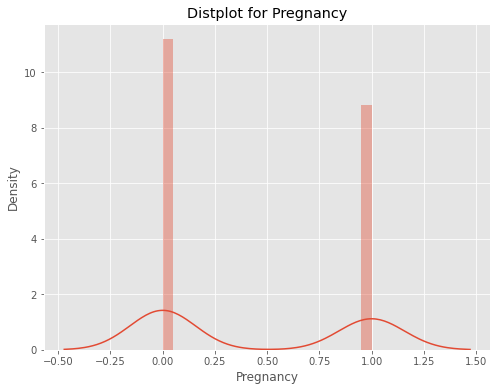

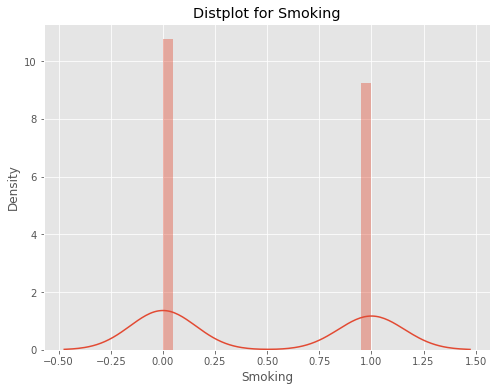

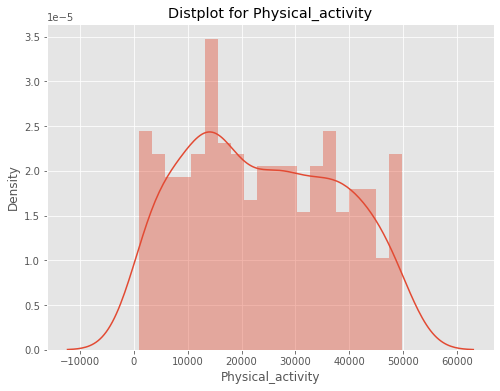

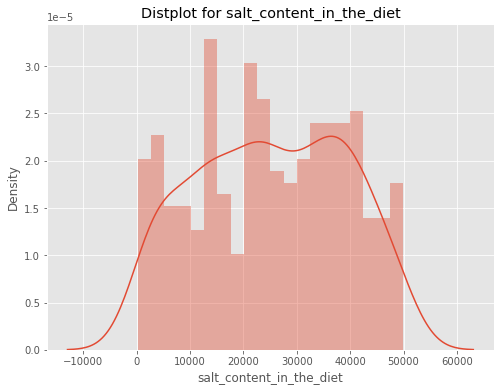

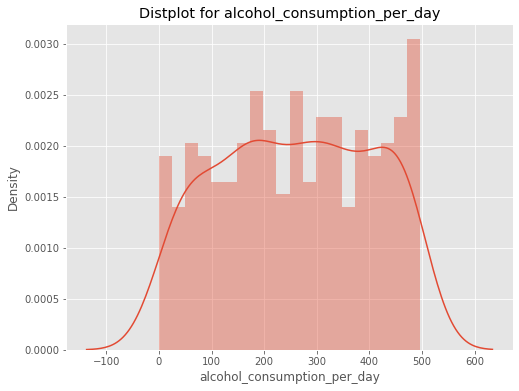

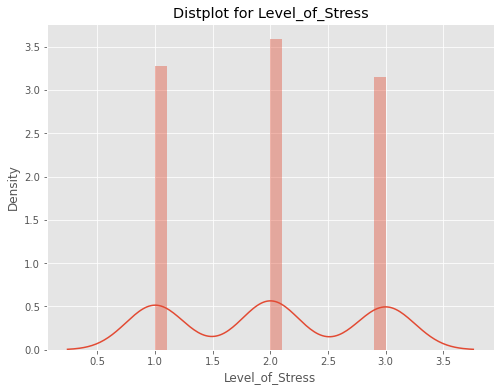

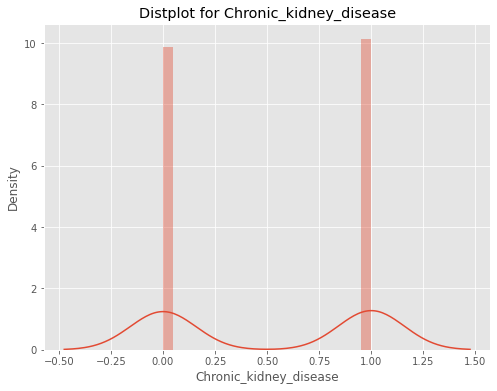

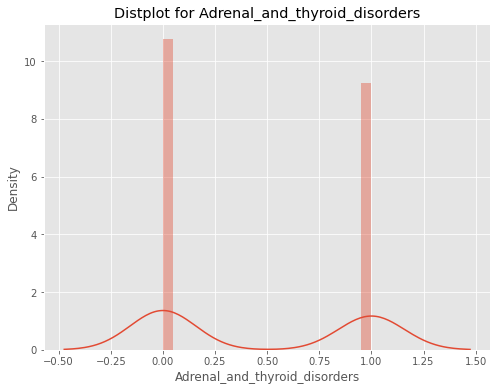

In [37]:
for i in num_vars:
    sns.distplot(BP[i], bins=20)
    plt.title('Distplot for {}'.format(i))
    plt.show()

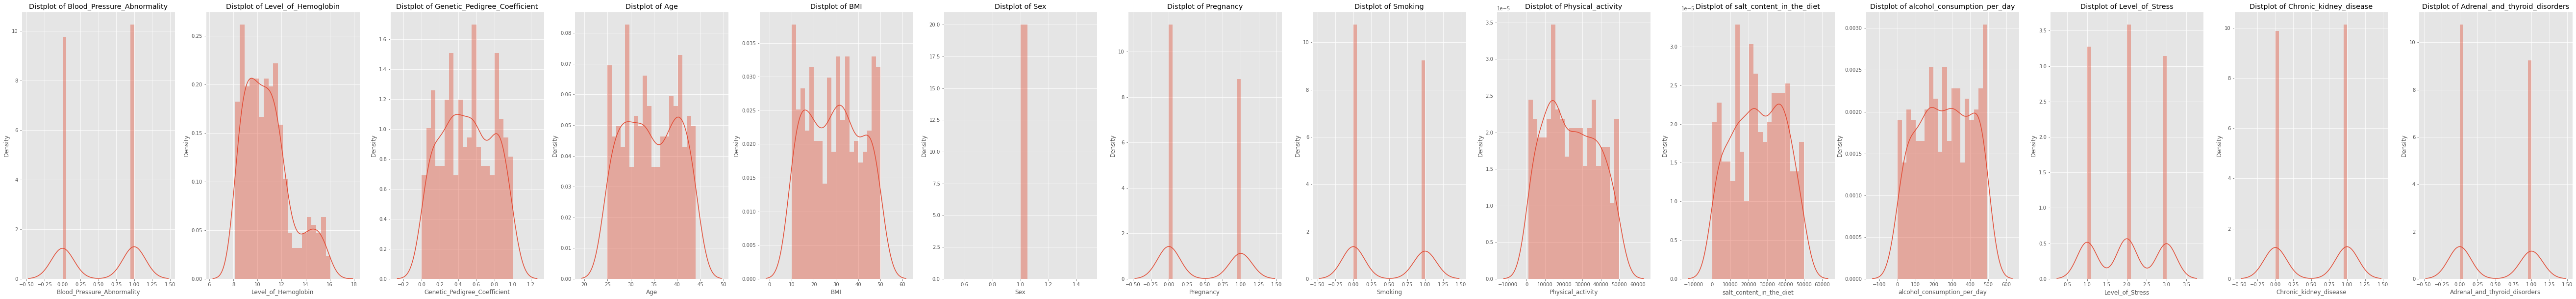

In [38]:
plt.figure(figsize=(100, 10))
n=0
for x in ["Blood_Pressure_Abnormality", "Level_of_Hemoglobin", "Genetic_Pedigree_Coefficient", "Age","BMI","Sex","Pregnancy","Smoking","Physical_activity","salt_content_in_the_diet",          
          "alcohol_consumption_per_day","Level_of_Stress","Chronic_kidney_disease","Adrenal_and_thyroid_disorders"]:
    n += 1
    plt.subplot(1,15,n)
    #plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(BP[x], bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

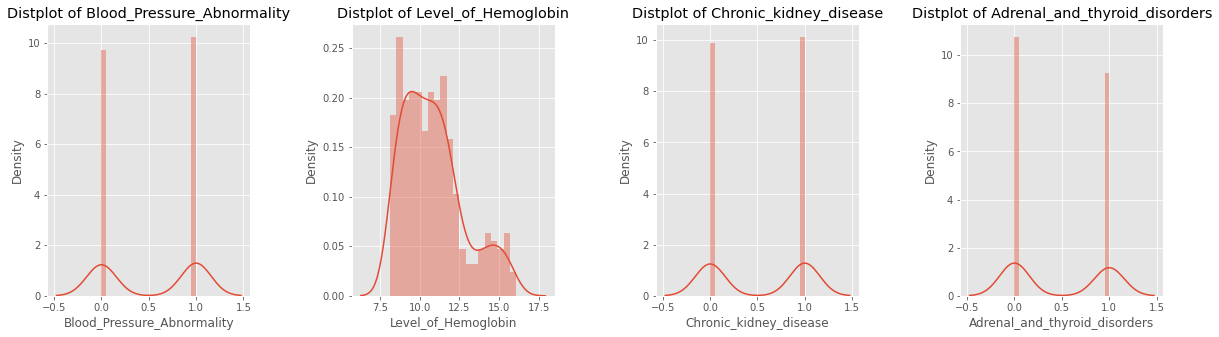

In [39]:
plt.figure(1,figsize=(80, 5))
n=0
for x in ["Blood_Pressure_Abnormality", "Level_of_Hemoglobin", "Chronic_kidney_disease","Adrenal_and_thyroid_disorders"]:
    n += 1
    plt.subplot(1,15,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(BP[x], bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

In [40]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer()
print(PT.fit_transform(BP))

[[ 0.9751514   0.62796371  0.8894111  ...  1.22920488  0.98749951
   1.07854778]
 [ 0.9751514   0.26671441 -1.44513433 ... -1.26438079  0.98749951
  -0.92717265]
 [ 0.9751514  -0.75393904  1.54957934 ... -1.26438079  0.98749951
   1.07854778]
 ...
 [-1.02548179  0.35068681  0.27493076 ... -1.26438079 -1.01265873
  -0.92717265]
 [ 0.9751514   1.69163586  1.32102434 ... -1.26438079  0.98749951
  -0.92717265]
 [ 0.9751514   1.64345231 -0.80067659 ... -1.26438079 -1.01265873
  -0.92717265]]


In [41]:
BP.shape

(318, 14)

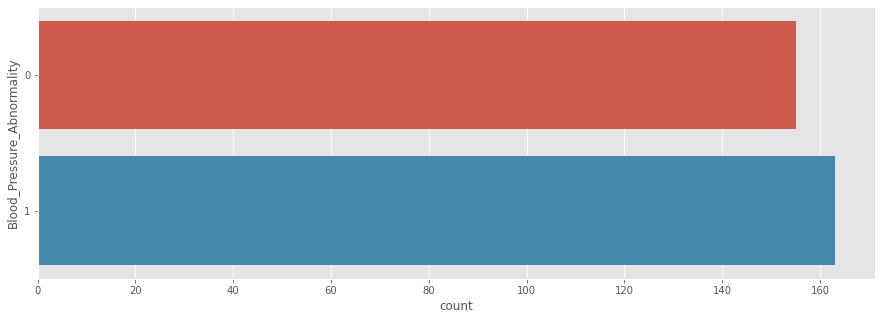

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(y="Blood_Pressure_Abnormality",data = BP)
plt.show()

In [43]:
BP.drop(["Sex"], axis=1, inplace=True)

In [44]:
corr_df = BP.corr()
corr_df

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Blood_Pressure_Abnormality,1.000000,-0.084690,-0.129831,-0.032765,-0.017506,-0.022318,0.033451,0.042752,0.070810,-0.026525,0.016107,0.433817,0.336297
Level_of_Hemoglobin,-0.084690,1.000000,-0.005597,0.078504,0.138620,-0.393608,0.010594,-0.102678,-0.009306,-0.030668,0.060560,-0.080363,-0.099704
Genetic_Pedigree_Coefficient,-0.129831,-0.005597,1.000000,0.044715,0.025702,0.077795,-0.071098,-0.043360,0.038859,0.016160,-0.008898,0.056405,-0.023132
Age,-0.032765,0.078504,0.044715,1.000000,0.122968,-0.004956,-0.056238,-0.006987,0.027649,-0.053838,0.005059,0.035608,-0.015393
BMI,-0.017506,0.138620,0.025702,0.122968,1.000000,0.018534,-0.039968,-0.024683,0.003452,-0.062668,-0.090144,-0.076986,0.016749
Pregnancy,-0.022318,-0.393608,0.077795,-0.004956,0.018534,1.000000,-0.174283,-0.083690,0.032027,0.015862,0.053480,-0.011156,-0.034521
Smoking,0.033451,0.010594,-0.071098,-0.056238,-0.039968,-0.174283,1.000000,0.018882,-0.065097,0.001929,-0.024816,-0.093665,0.051199
Physical_activity,0.042752,-0.102678,-0.043360,-0.006987,-0.024683,-0.083690,0.018882,1.000000,-0.059217,-0.098028,0.009340,0.000851,0.063085
salt_content_in_the_diet,0.070810,-0.009306,0.038859,0.027649,0.003452,0.032027,-0.065097,-0.059217,1.000000,-0.047043,-0.061712,-0.035259,0.038645
alcohol_consumption_per_day,-0.026525,-0.030668,0.016160,-0.053838,-0.062668,0.015862,0.001929,-0.098028,-0.047043,1.000000,0.152634,-0.019396,-0.033906


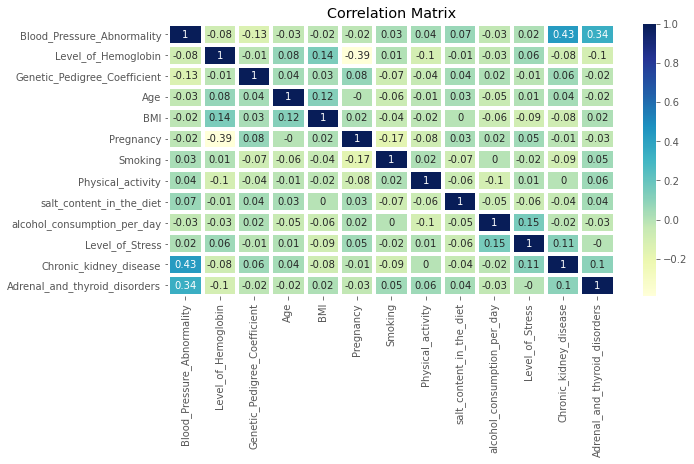

In [45]:
### finding Correlation among the variables:
plt.figure(figsize=(10,5))
sns.heatmap(round(BP.corr(),2), annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

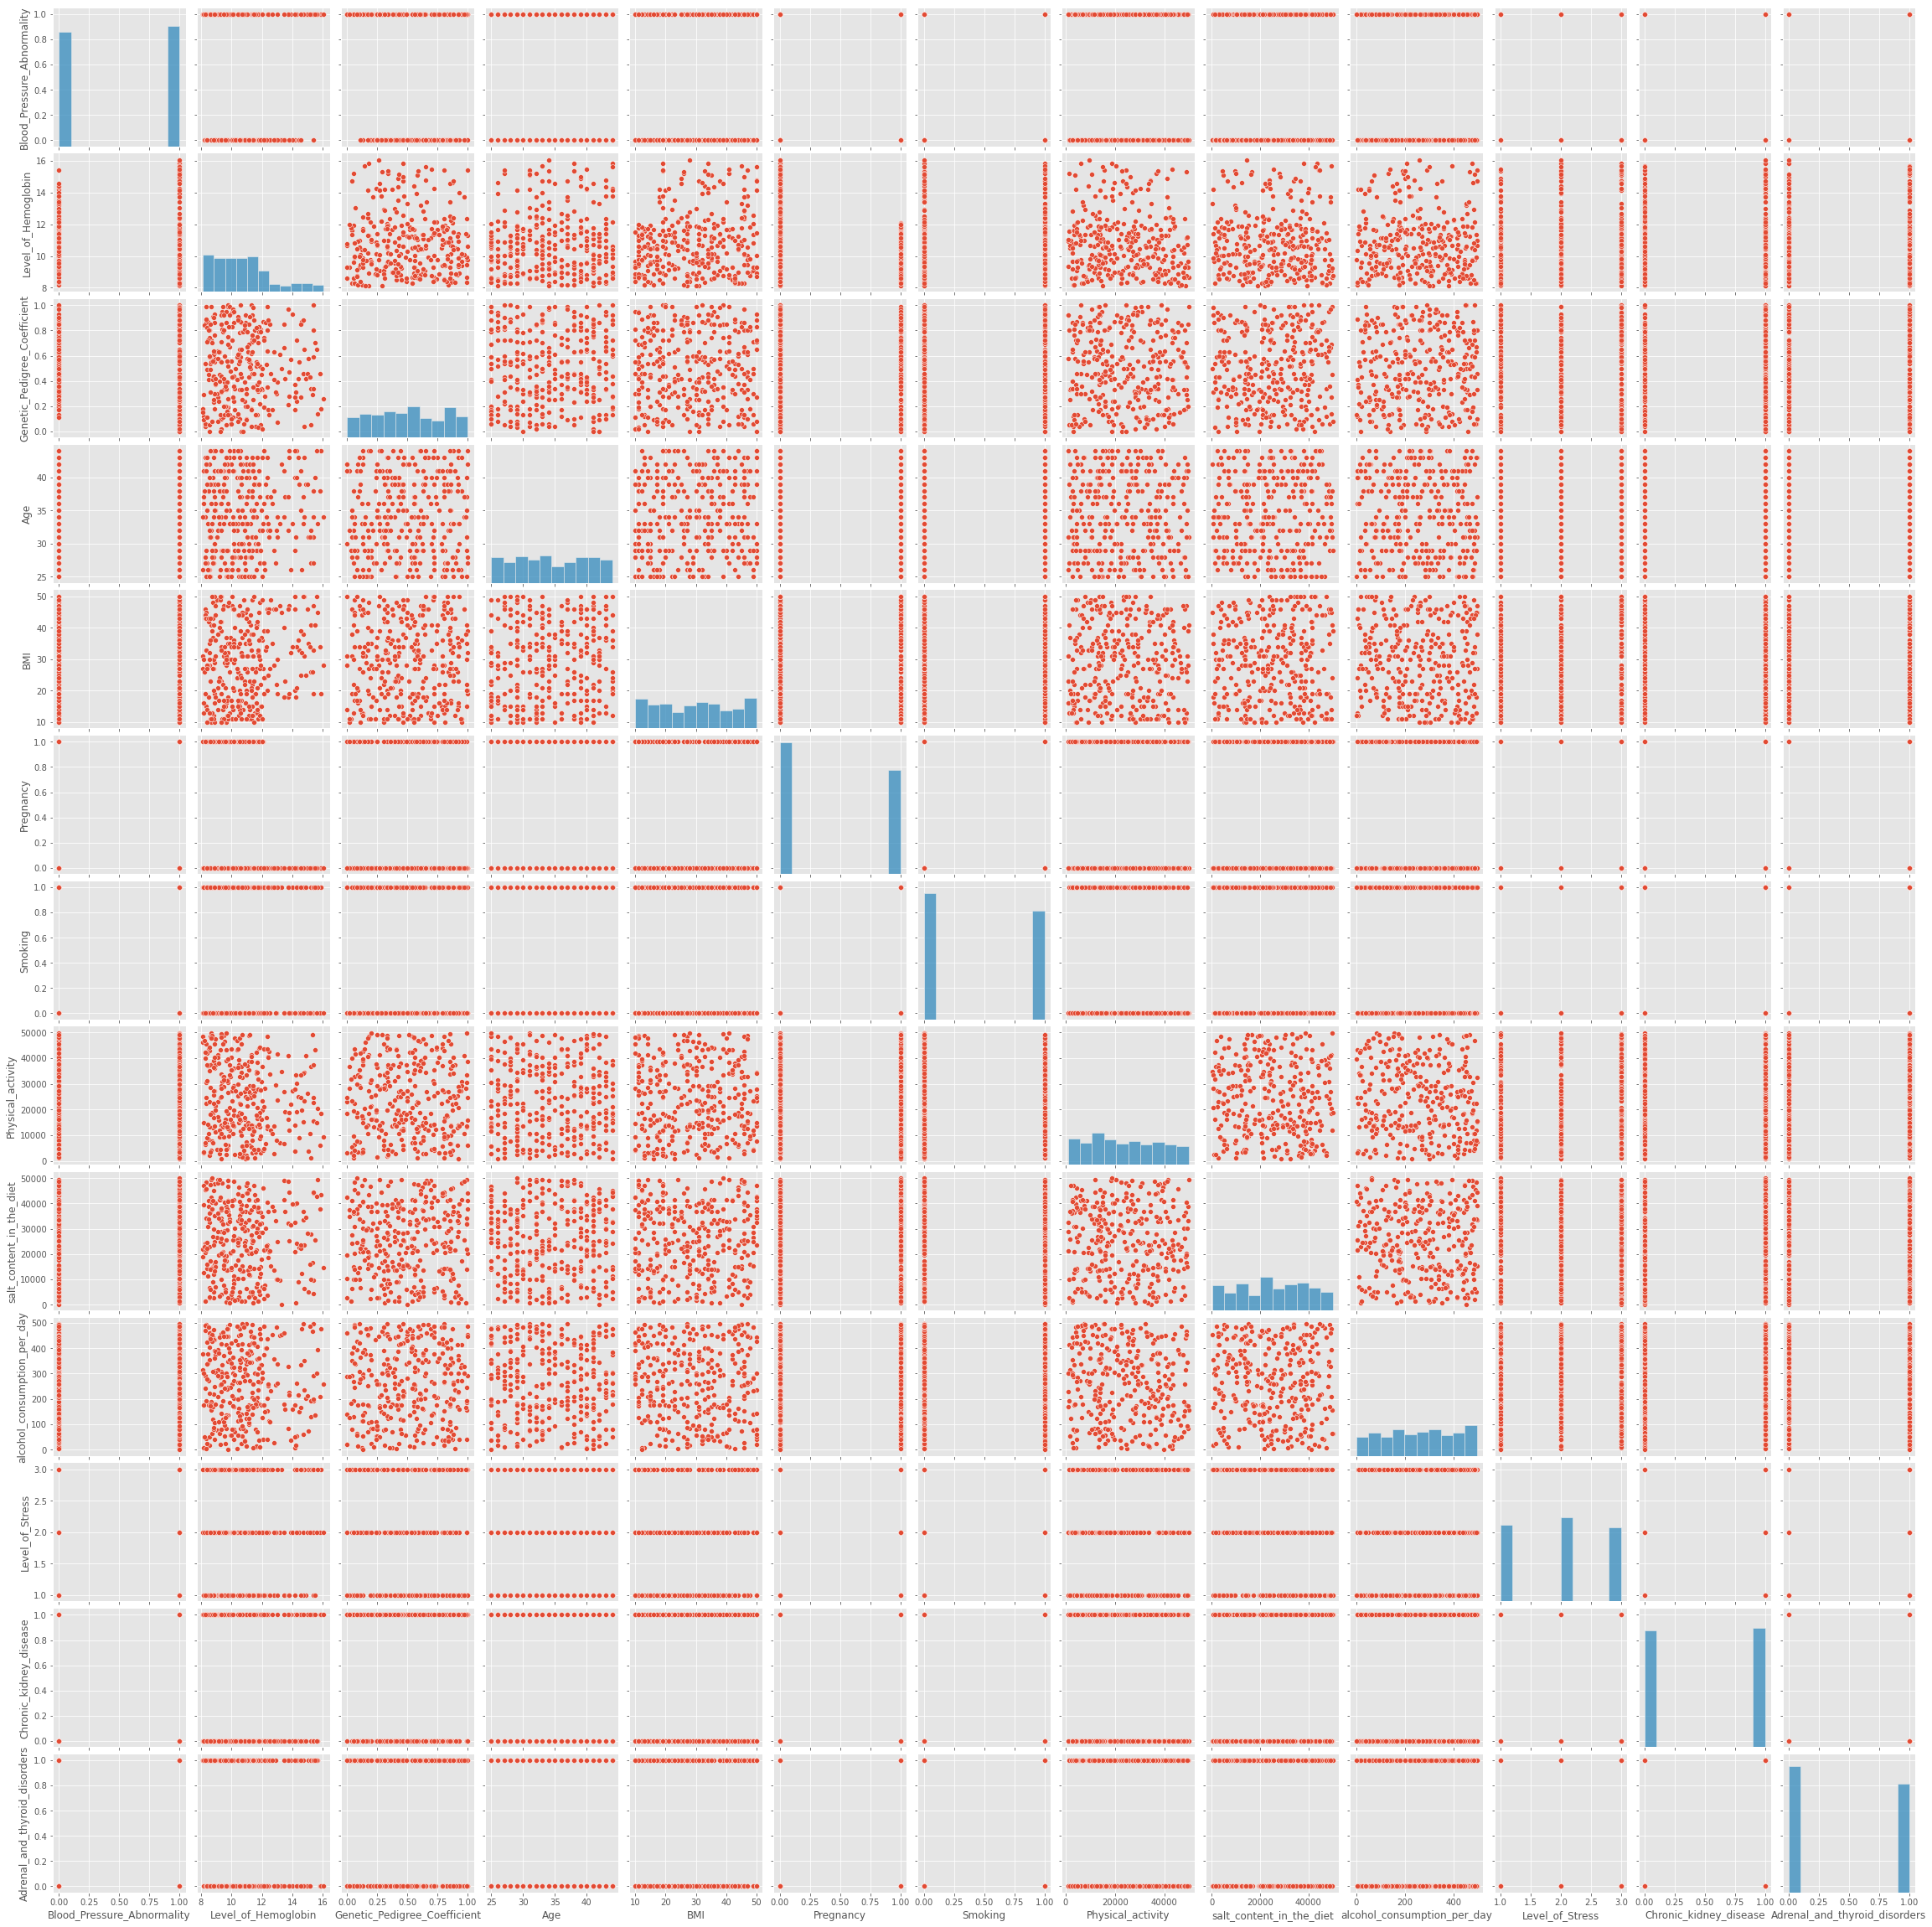

In [46]:
# Plotting Pair Plot 
sns.pairplot(BP)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

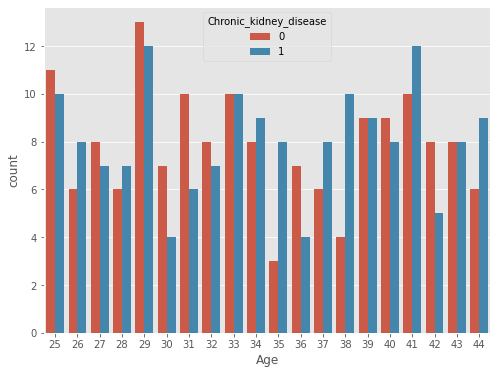

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x="Age", data=BP, hue='Chronic_kidney_disease')

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]),
 array([-0.7,  0.3,  1.3,  2.3,  3.3,  4.3,  5.3,  6.3,  7.3,  8.3,  9.3,
        10.3, 11.3, 12.3, 13.3]),
 <BarContainer object of 14 artists>)

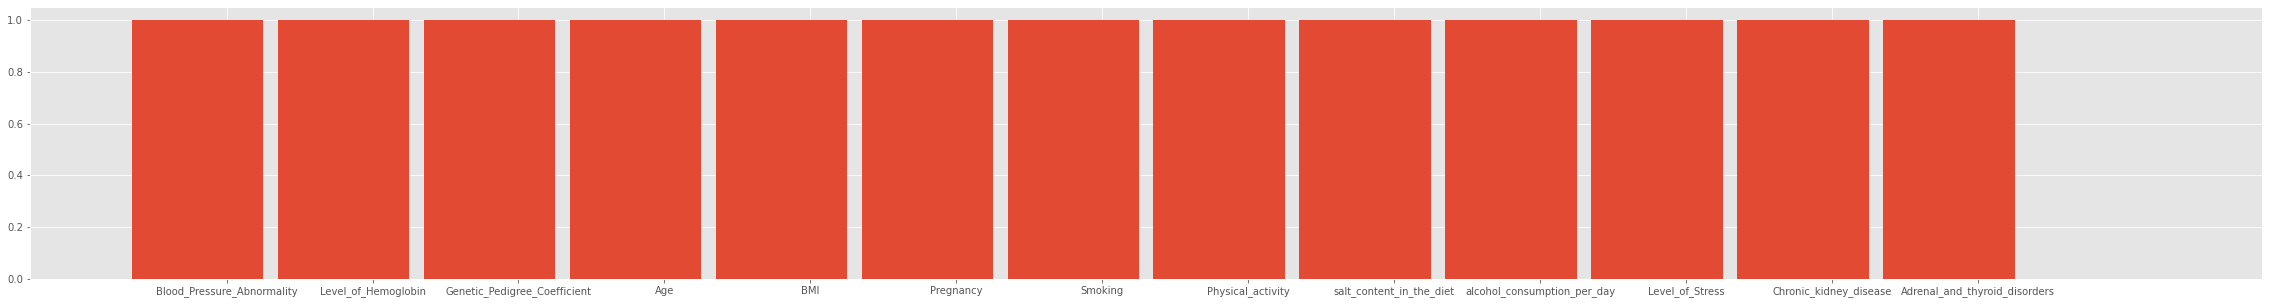

In [48]:
plt.subplots(figsize = (40,5))
plt.hist(BP.columns, bins = np.arange(15)-0.7, rwidth =0.9) 

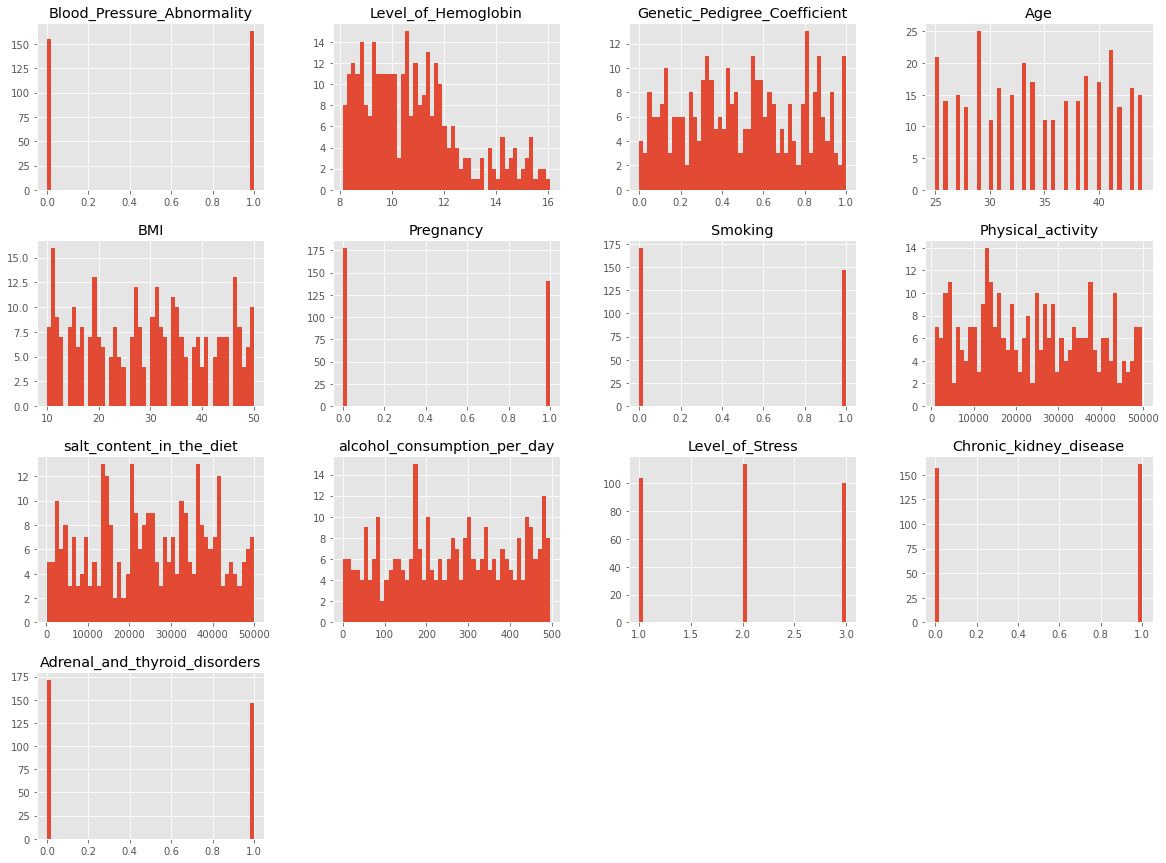

In [49]:
# for plotting histogram
%matplotlib inline
import matplotlib.pyplot as plt
BP.hist(bins=50,figsize=(20,15))
plt.show()

In [50]:
BP.columns

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Pregnancy', 'Smoking',
       'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

Finding the optimal clusters using:

1) K-Means\ 2) Hierarchical Clustering (Agglomerative)\ 3) Silhouette Score\ 4) Plotting Elbow Method\ 5)Finding the Segment Distributuion for each cluster\ 6) Performing Profiling

In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

In [52]:
X = BP.iloc[:, [1,12]].values

In [53]:
print(X)

[[11.69  1.  ]
 [10.96  0.  ]
 [ 9.37  1.  ]
 [14.19  1.  ]
 [10.49  0.  ]
 [11.16  0.  ]
 [ 8.29  0.  ]
 [10.15  0.  ]
 [10.51  0.  ]
 [11.93  0.  ]
 [10.49  0.  ]
 [10.52  0.  ]
 [11.38  1.  ]
 [ 9.3   1.  ]
 [15.08  1.  ]
 [12.07  0.  ]
 [ 8.64  0.  ]
 [11.31  1.  ]
 [ 9.64  1.  ]
 [10.53  0.  ]
 [15.23  1.  ]
 [11.54  0.  ]
 [11.55  0.  ]
 [ 9.63  0.  ]
 [10.61  1.  ]
 [12.04  0.  ]
 [13.18  0.  ]
 [11.71  0.  ]
 [10.4   0.  ]
 [13.5   1.  ]
 [ 8.76  1.  ]
 [ 9.75  0.  ]
 [14.39  0.  ]
 [10.94  0.  ]
 [ 9.31  1.  ]
 [14.42  1.  ]
 [10.91  0.  ]
 [ 8.48  1.  ]
 [15.36  1.  ]
 [10.02  0.  ]
 [10.69  1.  ]
 [ 8.63  0.  ]
 [15.83  0.  ]
 [ 8.13  1.  ]
 [ 9.76  1.  ]
 [ 8.68  0.  ]
 [ 8.31  0.  ]
 [ 9.47  0.  ]
 [14.71  1.  ]
 [15.34  1.  ]
 [11.96  0.  ]
 [11.65  0.  ]
 [ 9.79  1.  ]
 [ 9.08  1.  ]
 [15.86  0.  ]
 [ 8.18  1.  ]
 [11.84  1.  ]
 [ 9.44  0.  ]
 [11.38  0.  ]
 [10.05  0.  ]
 [11.65  0.  ]
 [10.65  0.  ]
 [11.92  0.  ]
 [ 8.91  1.  ]
 [11.07  0.  ]
 [ 9.78  1.  ]
 [ 8.91  1

**Step 1: Finding the Cophenetic Distance Correlation Coefficient for different Linkages**

Conclusion:
For the Agglomerative Clustering, the Cophenet distance correlation coefficient helps in deciding which linkage method is the most beneficial for the dataset. The higher the coefficient, the better it is. From the above, the best method is Average computed using CityBlock distance.

In [54]:
# Step 1: Finding the Cophenetic Distance Correlation Coefficient for different Linkages

for i  in ['single', 'complete', 'average']:
    print('Linkage is', i)
    for j in ['euclidean', 'cityblock', 'cosine']:
            Z= linkage(X, method = i , metric = j)
            c , coph_dist = cophenet(Z, pdist(X))
            print('Cophenetic Distance Correlation Coefficient for', j, 'distance is\t:', c)
    print()
    
Z= linkage(X, 'ward')
c , coph_dist = cophenet(Z, pdist(X))
print('Cophenetic Distance Correlation Coefficient for ward linkage is \t:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.29365756287037836
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.29365756287037836
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.13822837880758992

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.6214491920633095
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.8049664332447795
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.18087384573210188

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.8128729426467858
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.8085377630227539
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.1568428321999196

Cophenetic Distance Correlation Coefficient for ward linkage is 	: 0.6183015180571233


In [55]:
# Step 2: Finding the Optimal clusters using KMeans, Silhouette Coefficient Score for both KMeans and Agglomerative Clustering

wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3,9):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X, kmeans.labels_)
    sil_kmeans.append(sil_km)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, affinity = 'cityblock', linkage = 'average')
    agc.fit(X)
    sil_ag = silhouette_score(X, agc.labels_)
    sil_agc.append(sil_ag)
    
    print('Number of clusters:', i)
    print('KMeans Inertia :', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print('Silhouette Score for AGC(HCA):', sil_ag)
    print()

Number of clusters: 3
KMeans Inertia : 212.42797953627928
Silhouette Score for KMeans: 0.5289963739892305
Silhouette Score for AGC(HCA): 0.5010766094105489

Number of clusters: 4
KMeans Inertia : 152.97611452693303
Silhouette Score for KMeans: 0.45101476964580195
Silhouette Score for AGC(HCA): 0.46441908493140527

Number of clusters: 5
KMeans Inertia : 125.71016604925767
Silhouette Score for KMeans: 0.4075511931555673
Silhouette Score for AGC(HCA): 0.4040612278813411

Number of clusters: 6
KMeans Inertia : 104.22376375520898
Silhouette Score for KMeans: 0.49257197796222824
Silhouette Score for AGC(HCA): 0.3894329219146929

Number of clusters: 7
KMeans Inertia : 85.06169789610155
Silhouette Score for KMeans: 0.5285980348171551
Silhouette Score for AGC(HCA): 0.3990096282399592

Number of clusters: 8
KMeans Inertia : 67.20515289012296
Silhouette Score for KMeans: 0.5262924853386655
Silhouette Score for AGC(HCA): 0.45388435146653733



In [56]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X)
    sil.finalize()

ModuleNotFoundError: No module named 'yellowbrick'

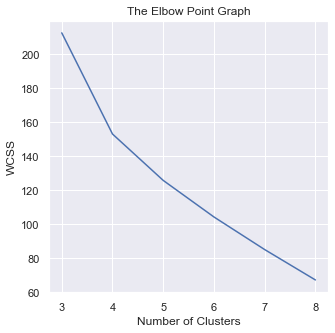

In [57]:
# plot an elbow graph
plt.figure(figsize=(5,5))
sns.set()
plt.plot(range(3,9), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# Inertia or Sum of Squared Errors within the Clusters is also known as the Cluster Errors
# CLuster error will decrease after some Clusters 

In [58]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 5 4 3 5 5 0 5 5 1 5 5 2 4 3 1 0 2 4 5 3 1 1 0 2 1 1 1 5 3 4 0 3 5 4 3 5
 4 3 5 2 0 3 4 4 0 0 0 3 3 1 1 4 4 3 4 2 0 5 5 1 5 1 4 5 4 4 2 1 2 5 3 1 5
 5 3 5 1 4 4 1 0 0 5 4 5 5 2 5 0 5 4 0 4 2 5 1 1 2 4 4 4 4 4 4 4 0 1 1 3 1
 2 1 4 5 0 4 4 3 0 4 0 4 3 2 1 4 1 3 3 4 4 4 5 4 2 1 2 0 5 0 5 1 4 5 1 2 5
 4 1 5 5 0 2 0 1 0 4 0 3 5 3 5 1 2 3 2 1 5 0 5 1 4 5 4 2 2 4 0 5 4 1 4 0 3
 4 4 0 4 1 3 5 0 4 5 0 2 2 5 3 3 4 4 0 4 4 4 2 1 4 1 4 5 5 3 1 0 5 3 2 5 4
 5 0 5 0 1 3 1 2 4 3 4 0 3 4 0 2 4 1 0 2 1 4 1 5 1 0 4 4 2 1 4 5 2 1 1 2 5
 4 4 3 4 0 5 0 0 1 3 0 4 1 5 3 4 4 5 0 5 4 0 1 4 1 0 1 2 5 5 4 3 2 0 3 1 5
 4 3 5 5 4 1 4 3 3 5 2 4 5 2 5 2 5 4 1 5 3 3]


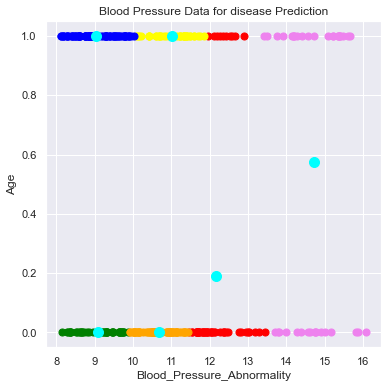

In [62]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 5')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 6')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 7')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='orange', label='Cluster 8')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Blood Pressure Data for disease Prediction')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('Age')
plt.show()

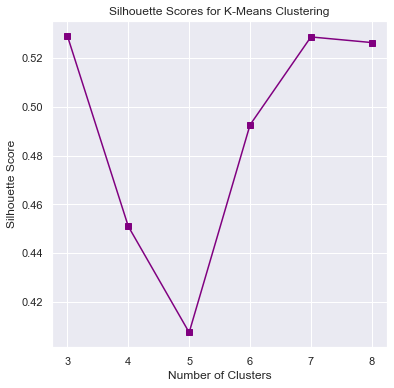

In [63]:
# Plotting the Silhouette Score for the clusters found from K-Means and Agglomerative Clustering

plt.figure(figsize=(6,6))
plt.plot(range(3,9), sil_kmeans, marker='s', c='purple')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

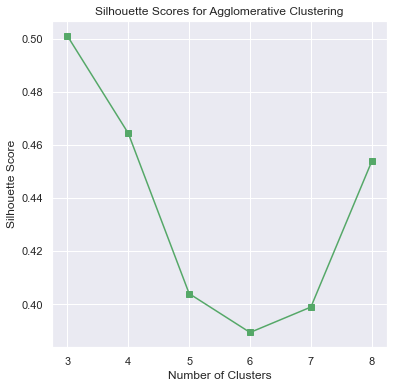

In [64]:
# Plotting the Silhouette Score for the clusters found from K-Means and Agglomerative Clustering

plt.figure(figsize=(6,6))
plt.plot(range(3,9), sil_agc, marker='s', c='g')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Segment Distribution
---
Segment distribution gives the percentage of values in each Segment

In [65]:
# Step 1: Making K-Means Cluster and Labels for finding out the distribution of Segments and then performing Profiling
# K = 3
km_3 = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)             
KM_3 = km_3.fit(X)

In [66]:
# Labels of Cluster 3
KM_3.labels_

array([2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0,

In [67]:
# Centroids for Cluster 3:
KM_3.cluster_centers_

array([[ 9.18489362,  0.58156028],
       [14.4793617 ,  0.5106383 ],
       [11.32915385,  0.31538462]])

**Taking Clsuters for K = 4,5, 6,7,8**

In [68]:
KM_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_5 = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_7 = KMeans(n_clusters = 7, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_8 = KMeans(n_clusters = 8, n_init = 100, init='k-means++', random_state = 0).fit(X)

In [69]:
# Appending the Cluster labels to the Original Data: (not to Standardized data)

BP['cluster_3'] = KM_3.labels_
BP['cluster_4'] = KM_4.labels_
BP['cluster_5'] = KM_5.labels_
BP['cluster_6'] = KM_6.labels_
BP['cluster_7'] = KM_7.labels_
BP['cluster_8'] = KM_8.labels_

In [70]:
BP.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
6,1,11.69,0.75,43,41,1.0,0,38369,32967,206.0,3,1,1,2,3,4,4,6,6
15,1,10.96,0.10,43,27,1.0,0,7329,39018,495.0,1,1,0,2,2,2,2,4,4
28,1,9.37,0.95,38,11,0.0,0,30738,48217,336.0,1,1,1,0,1,3,3,1,3
30,0,14.19,0.37,40,46,0.0,0,3922,39971,8.0,3,0,1,1,0,1,5,0,2
35,0,10.49,0.54,25,16,1.0,0,14798,26236,449.0,3,0,0,2,2,2,2,4,4


In [71]:
# Finding the Segment Distribution for cluster K = 3 :

pd.Series.sort_index(BP.cluster_3.value_counts())/sum(BP.cluster_3.value_counts())

0    0.443396
1    0.147799
2    0.408805
Name: cluster_3, dtype: float64

In [72]:
# Segment Distribution for cluster K = 4 :

pd.Series.sort_index(BP.cluster_4.value_counts())/sum(BP.cluster_4.value_counts())

0    0.128931
1    0.336478
2    0.289308
3    0.245283
Name: cluster_4, dtype: float64

In [73]:
# Segment Distribution for cluster K = 5 :

pd.Series.sort_index(BP.cluster_5.value_counts())/sum(BP.cluster_5.value_counts())

0    0.204403
1    0.125786
2    0.251572
3    0.238994
4    0.179245
Name: cluster_5, dtype: float64

In [74]:
# Segment Distribution for cluster K = 6 :

pd.Series.sort_index(BP.cluster_6.value_counts())/sum(BP.cluster_6.value_counts())

0    0.141509
1    0.166667
2    0.207547
3    0.242138
4    0.116352
5    0.125786
Name: cluster_6, dtype: float64

In [75]:
# Segment Distribution for cluster K = 7 :

pd.Series.sort_index(BP.cluster_7.value_counts())/sum(BP.cluster_7.value_counts())

0    0.125786
1    0.122642
2    0.163522
3    0.141509
4    0.207547
5    0.144654
6    0.094340
Name: cluster_7, dtype: float64

In [76]:
# Segment Distribution for cluster K = 8 :

pd.Series.sort_index(BP.cluster_8.value_counts())/sum(BP.cluster_8.value_counts())

0    0.138365
1    0.132075
2    0.100629
3    0.122642
4    0.188679
5    0.144654
6    0.106918
7    0.066038
Name: cluster_8, dtype: float64

Profiling:-
---
The goal of Profiling is to be able to differentiate between the groups with the proper distinction that means each group has some unique characteristics about it and then that cluster is the ideal solution to segment the values.

Steps to do Profiling are:
1) Find the count of each segment (value_counts) ----> that gives how many observations or records are present in each segment\ 2) For each of the variable: find the overall average and the individual segment-wise average\ 3) Perform the above two steps for each K value to find the best profiling

Step 1 of Profiling:
Finding how many observations or records are present in each segment

In [77]:
# Step 1a: Get the total size of the cluster:
BP.cluster_3.size

# Step 1b: Get the break up of the values in each segment:
# which gives how many observations are there in each of the respective segment:

BP.cluster_3.value_counts()

0    141
2    130
1     47
Name: cluster_3, dtype: int64

In [78]:
# by using the Sort Index provides:
# the value counts based on the Segment Label (0,1,2 depending upon the K-value) in the index
# and not based on the highest value within the segments

pd.Series.sort_index(BP.cluster_3.value_counts())

0    141
1     47
2    130
Name: cluster_3, dtype: int64

In [79]:
# combining the size for each cluster K value into one single array:

size=pd.concat([pd.Series(BP.cluster_3.size), pd.Series.sort_index(BP.cluster_3.value_counts()), pd.Series.sort_index(BP.cluster_4.value_counts()),
           pd.Series.sort_index(BP.cluster_5.value_counts()), pd.Series.sort_index(BP.cluster_6.value_counts()),
           pd.Series.sort_index(BP.cluster_7.value_counts()), pd.Series.sort_index(BP.cluster_8.value_counts())])

In [80]:
# Gives the size of Segments for each of the Clusters :

size

0    318
0    141
1     47
2    130
0     41
1    107
2     92
3     78
0     65
1     40
2     80
3     76
4     57
0     45
1     53
2     66
3     77
4     37
5     40
0     40
1     39
2     52
3     45
4     66
5     46
6     30
0     44
1     42
2     32
3     39
4     60
5     46
6     34
7     21
dtype: int64

In [81]:
# Segment Size:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])

# Segment Distribtuion % wise:
Seg_Pct = pd.DataFrame(size/BP.cluster_3.size, columns=['Seg_Pct'])

In [82]:
# Taking Transpose of Segment Percentage :
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.443396,0.147799,0.408805,0.128931,0.336478,0.289308,0.245283,0.204403,0.125786,...,0.144654,0.09434,0.138365,0.132075,0.100629,0.122642,0.188679,0.144654,0.106918,0.066038


In [83]:
# Concatenating the Segment Size and Segment Percentage:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,318.0,141.000000,47.000000,130.000000,41.000000,107.000000,92.000000,78.000000,65.000000,40.000000,...,46.000000,30.00000,44.000000,42.000000,32.000000,39.000000,60.000000,46.000000,34.000000,21.000000
Seg_Pct,1.0,0.443396,0.147799,0.408805,0.128931,0.336478,0.289308,0.245283,0.204403,0.125786,...,0.144654,0.09434,0.138365,0.132075,0.100629,0.122642,0.188679,0.144654,0.106918,0.066038


Step 2 of Profiling:
---
For each of the variable :  find the overall average and the inidividual segment wise average

A good indication of the distribution of data is the mean value, hence will find the average value for each variable and for each cluster.**

In [84]:
# Overall each variables wise Avg:
BP.apply(np.mean).T

Blood_Pressure_Abnormality           0.512579
Level_of_Hemoglobin                 10.843994
Genetic_Pedigree_Coefficient         0.499843
Age                                 34.389937
BMI                                 29.182390
Pregnancy                            0.440252
Smoking                              0.462264
Physical_activity                23860.078616
salt_content_in_the_diet         25146.110063
alcohol_consumption_per_day        260.113208
Level_of_Stress                      1.987421
Chronic_kidney_disease               0.506289
Adrenal_and_thyroid_disorders        0.462264
cluster_3                            0.965409
cluster_4                            1.650943
cluster_5                            2.062893
cluster_6                            2.402516
cluster_7                            2.993711
cluster_8                            3.283019
dtype: float64

In [85]:
# Grouping-by over each cluster to find the Segment wise average for each variable
BP.groupby('cluster_3').apply(np.mean).T

cluster_3,0,1,2
Blood_Pressure_Abnormality,0.652482,0.680851,0.300000
Level_of_Hemoglobin,9.184894,14.479362,11.329154
Genetic_Pedigree_Coefficient,0.492695,0.474468,0.516769
Age,34.113475,35.702128,34.215385
BMI,28.411348,33.553191,28.438462
Pregnancy,0.567376,0.000000,0.461538
Smoking,0.489362,0.489362,0.423077
Physical_activity,25527.439716,22630.553191,22496.153846
salt_content_in_the_diet,25507.290780,26396.276596,24302.384615
alcohol_consumption_per_day,262.723404,252.574468,260.007692


In [86]:
# Concatinating the above two averages:

Profiling_output = pd.concat([BP.apply(lambda x: x.mean()).T, 
                BP.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                BP.groupby('cluster_4').apply(lambda x: x.mean()).T,
                BP.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                BP.groupby('cluster_6').apply(lambda x: x.mean()).T,
                BP.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                BP.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [87]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Blood_Pressure_Abnormality,0.512579,0.652482,0.680851,0.300000,0.756098,0.728972,0.369565,0.256410,0.846154,0.77500,...,0.869565,0.466667,0.477273,0.190476,0.843750,0.743590,0.300000,0.869565,0.411765,0.285714
Level_of_Hemoglobin,10.843994,9.184894,14.479362,11.329154,14.687073,8.945981,10.440870,11.903077,8.626308,14.71825,...,8.645870,11.226000,9.074773,11.815000,14.964063,9.708462,10.574833,8.645870,11.344412,13.213333
Genetic_Pedigree_Coefficient,0.499843,0.492695,0.474468,0.516769,0.490732,0.498972,0.487283,0.520641,0.504308,0.48650,...,0.463478,0.526667,0.529773,0.537143,0.461250,0.495641,0.485333,0.463478,0.538824,0.487143
Age,34.389937,34.113475,35.702128,34.215385,36.073171,34.158879,34.282609,33.948718,33.953846,36.12500,...,33.913043,34.233333,34.909091,33.785714,36.000000,34.487179,33.766667,33.913043,34.352941,34.761905
BMI,29.182390,28.411348,33.553191,28.438462,33.365854,28.429907,27.826087,29.615385,29.092308,33.75000,...,27.913043,28.733333,29.977273,28.452381,34.093750,26.794872,27.100000,27.913043,29.529412,34.095238
Pregnancy,0.440252,0.567376,0.000000,0.461538,0.000000,0.607477,0.521739,0.346154,0.615385,0.00000,...,0.521739,0.500000,0.659091,0.428571,0.000000,0.589744,0.516667,0.521739,0.441176,0.000000
Smoking,0.462264,0.489362,0.489362,0.423077,0.463415,0.467290,0.434783,0.487179,0.461538,0.47500,...,0.500000,0.400000,0.454545,0.404762,0.500000,0.512821,0.383333,0.500000,0.470588,0.571429
Physical_activity,23860.078616,25527.439716,22630.553191,22496.153846,22409.512195,25903.504673,23768.967391,21926.858974,27091.076923,22295.95000,...,28128.891304,20787.600000,23741.840909,23793.428571,22781.468750,25779.743590,22530.466667,28128.891304,21029.000000,21351.428571
salt_content_in_the_diet,25146.110063,25507.290780,26396.276596,24302.384615,28107.707317,26965.429907,23931.836957,22525.858974,25454.138462,27585.67500,...,24456.891304,25100.966667,28823.068182,23438.428571,25092.281250,26279.589744,22589.366667,24456.891304,25090.676471,27738.809524
alcohol_consumption_per_day,260.113208,262.723404,252.574468,260.007692,234.951220,265.785047,253.826087,272.974359,266.953846,229.30000,...,285.304348,249.933333,262.750000,275.523810,243.156250,249.692308,249.850000,285.304348,247.852941,262.952381


In [88]:
# Combining the outputs from steps 1 and 2: 
# Concatenating the segment size, segment distribution, the overall averages, and the individual segment-wise average 

Profiling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)

# Adding column names

Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [89]:
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,318.000000,141.000000,47.000000,130.000000,41.000000,107.000000,92.000000,78.000000,65.000000,40.000000,...,46.000000,30.000000,44.000000,42.000000,32.000000,39.000000,60.000000,46.000000,34.000000,21.000000
Seg_Pct,1.000000,0.443396,0.147799,0.408805,0.128931,0.336478,0.289308,0.245283,0.204403,0.125786,...,0.144654,0.094340,0.138365,0.132075,0.100629,0.122642,0.188679,0.144654,0.106918,0.066038
Blood_Pressure_Abnormality,0.512579,0.652482,0.680851,0.300000,0.756098,0.728972,0.369565,0.256410,0.846154,0.775000,...,0.869565,0.466667,0.477273,0.190476,0.843750,0.743590,0.300000,0.869565,0.411765,0.285714
Level_of_Hemoglobin,10.843994,9.184894,14.479362,11.329154,14.687073,8.945981,10.440870,11.903077,8.626308,14.718250,...,8.645870,11.226000,9.074773,11.815000,14.964063,9.708462,10.574833,8.645870,11.344412,13.213333
Genetic_Pedigree_Coefficient,0.499843,0.492695,0.474468,0.516769,0.490732,0.498972,0.487283,0.520641,0.504308,0.486500,...,0.463478,0.526667,0.529773,0.537143,0.461250,0.495641,0.485333,0.463478,0.538824,0.487143
Age,34.389937,34.113475,35.702128,34.215385,36.073171,34.158879,34.282609,33.948718,33.953846,36.125000,...,33.913043,34.233333,34.909091,33.785714,36.000000,34.487179,33.766667,33.913043,34.352941,34.761905
BMI,29.182390,28.411348,33.553191,28.438462,33.365854,28.429907,27.826087,29.615385,29.092308,33.750000,...,27.913043,28.733333,29.977273,28.452381,34.093750,26.794872,27.100000,27.913043,29.529412,34.095238
Pregnancy,0.440252,0.567376,0.000000,0.461538,0.000000,0.607477,0.521739,0.346154,0.615385,0.000000,...,0.521739,0.500000,0.659091,0.428571,0.000000,0.589744,0.516667,0.521739,0.441176,0.000000
Smoking,0.462264,0.489362,0.489362,0.423077,0.463415,0.467290,0.434783,0.487179,0.461538,0.475000,...,0.500000,0.400000,0.454545,0.404762,0.500000,0.512821,0.383333,0.500000,0.470588,0.571429
Physical_activity,23860.078616,25527.439716,22630.553191,22496.153846,22409.512195,25903.504673,23768.967391,21926.858974,27091.076923,22295.950000,...,28128.891304,20787.600000,23741.840909,23793.428571,22781.468750,25779.743590,22530.466667,28128.891304,21029.000000,21351.428571


In [90]:
# Exporting the output:
Profiling_output_final.to_csv('Profiling_output_final.csv')

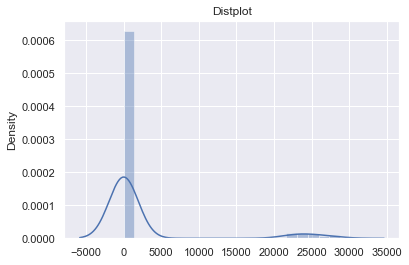

In [91]:
sns.distplot(Profiling_output_final, bins=20)
plt.title('Distplot')
plt.show()